In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy import stats
stats.chisqprob = lambda chisq,df:stats.chi2.sf(chisq,df)

In [2]:
path = "/home/iamchiranjeeb/Desktop/amita/Binary predictors.csv"
df = pd.read_csv(path)
df.head()

,SAT,Admitted,Gender
0,1363,No,Male
1,1792,Yes,Female
2,1954,Yes,Female
3,1653,No,Male
4,1593,No,Male


In [3]:
data = df.copy()
data['Admitted'] = data['Admitted'].map({'Yes':1,'No':0})
data['Gender'] = data['Gender'].map({'Female':1,'Male':0})
data.head(3)

,SAT,Admitted,Gender
0,1363,0,0
1,1792,1,1
2,1954,1,1


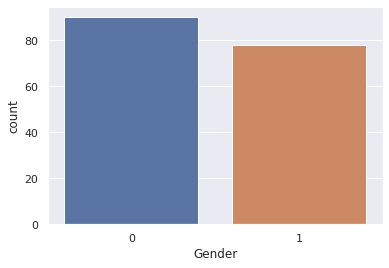

In [5]:
sns.countplot(x="Gender",data=data)

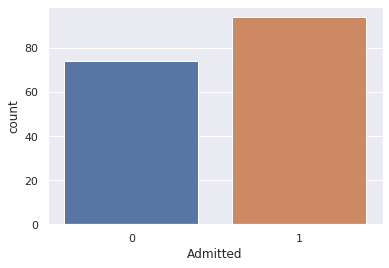

In [4]:
sns.countplot(x="Admitted",data=data)

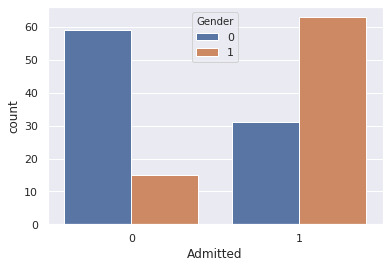

In [6]:
sns.countplot(x="Admitted",hue="Gender",data=data)

In [7]:
y = data['Admitted']
x1 = data[['SAT','Gender']]

In [8]:
x = sm.add_constant(x1)
reg_log = sm.Logit(y,x)
result_log = reg_log.fit()
result_log.summary()

/home/iamchiranjeeb/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Optimization terminated successfully.
         Current function value: 0.120117
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      165
Method:                           MLE   Df Model:                            2
Date:                Sat, 26 Sep 2020   Pseudo R-squ.:                  0.8249
Time:                        00:22:10   Log-Likelihood:                -20.180
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.118e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -68.3489     16.454     -4.154      0.000    -100.598     -36.100
SAT            0.0406      0.010      4.129      0.000       0.021       0.060
Gender         1.9449      0.846      2.299      0.022       0.287       3.603
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [9]:
np.set_printoptions(formatter={'float':lambda x:"{0:0.2f}".format(x)})
result_log.predict()

array([0.00, 1.00, 1.00, 0.23, 0.02, 0.99, 1.00, 1.00, 1.00, 0.01, 1.00,
       1.00, 0.76, 0.00, 0.60, 1.00, 0.11, 0.12, 0.51, 1.00, 1.00, 1.00,
       0.00, 0.01, 0.97, 1.00, 0.48, 0.99, 1.00, 0.99, 0.00, 0.83, 0.25,
       1.00, 1.00, 1.00, 0.31, 1.00, 0.23, 0.00, 0.02, 0.45, 1.00, 0.00,
       0.99, 0.00, 0.99, 0.00, 0.00, 0.01, 0.00, 1.00, 0.92, 0.02, 1.00,
       0.00, 0.37, 0.98, 0.12, 1.00, 0.00, 0.78, 1.00, 1.00, 0.98, 0.00,
       0.00, 0.00, 1.00, 0.00, 0.78, 0.12, 0.00, 0.99, 1.00, 1.00, 0.00,
       0.30, 1.00, 1.00, 0.00, 1.00, 1.00, 0.85, 1.00, 1.00, 0.00, 1.00,
       1.00, 0.89, 0.83, 0.00, 0.98, 0.97, 0.00, 1.00, 1.00, 0.03, 0.99,
       0.96, 1.00, 0.00, 1.00, 0.01, 0.01, 1.00, 1.00, 1.00, 0.00, 0.00,
       0.02, 0.33, 0.00, 1.00, 0.09, 0.00, 0.97, 0.00, 0.75, 1.00, 1.00,
       0.01, 0.01, 0.00, 1.00, 0.00, 0.99, 0.57, 0.54, 0.87, 0.83, 0.00,
       1.00, 0.00, 0.00, 0.00, 1.00, 0.04, 0.00, 0.01, 1.00, 0.99, 0.52,
       1.00, 1.00, 0.05, 0.00, 0.00, 0.00, 0.68, 1.

In [10]:
np.array(data['Admitted'])

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0])

In [11]:
result_log.pred_table()

array([[69.00, 5.00],
       [4.00, 90.00]])

In [14]:
cm_df = pd.DataFrame(result_log.pred_table())
cm_df.columns = {'Predictde 0','Predicted 1'}
cm_df = cm_df.rename(index={0:'Actual 0',1:'Actual 1'})
cm_df

,Predictde 0,Predicted 1
Actual 0,69.0,5.0
Actual 1,4.0,90.0


In [15]:
predTable = result_log.pred_table()

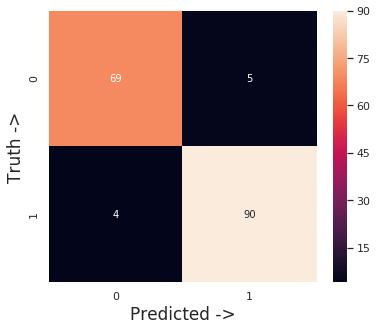

In [16]:
plt.figure(figsize=(6,5))
sns.heatmap(predTable,annot=True)
plt.xlabel("Predicted ->",fontsize=17)
plt.ylabel("Truth ->",fontsize=17)
plt.show()

In [17]:
cm = np.array(cm_df)
accuracyRate = (cm[0,0]+cm[1,1])/cm.sum()
accuracyRate

0.9464285714285714

# Testing

In [18]:
testPath = "/home/iamchiranjeeb/Desktop/amita/Test dataset.csv"
test = pd.read_csv(testPath)
test.head()

,SAT,Admitted,Gender
0,1323,No,Male
1,1725,Yes,Female
2,1762,Yes,Female
3,1777,Yes,Male
4,1665,No,Male


In [19]:
test['Admitted'] = test['Admitted'].map({'Yes':1,'No':0})
test['Gender'] = test['Gender'].map({'Female':1,'Male':0})
data.head(3)

,SAT,Admitted,Gender
0,1363,0,0
1,1792,1,1
2,1954,1,1


In [21]:
test_actual = test['Admitted']
test_data = test.drop(['Admitted'],axis=1)
test_data = sm.add_constant(test_data)
test_data

/home/iamchiranjeeb/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,SAT,Gender
0,1.0,1323,0
1,1.0,1725,1
2,1.0,1762,1
3,1.0,1777,0
4,1.0,1665,0
5,1.0,1556,1
6,1.0,1731,1
7,1.0,1809,1
8,1.0,1930,1
9,1.0,1708,0


In [24]:
def confusion_matrix(data,actual_values,model):
    pred_values = model.predict(data)
    bins = np.array([0,0.5,1])
    cm = np.histogram2d(actual_values,pred_values,bins=bins)[0]
    accuracyRate = (cm[0,0]+cm[1,1])/cm.sum()
    return cm, accuracyRate

In [25]:
cm = confusion_matrix(test_data,test_actual,result_log)
cm

(array([[5.00, 1.00],
        [1.00, 12.00]]), 0.8947368421052632)

In [26]:
cm_df = pd.DataFrame(cm[0])
cm_df.columns = {'Predictde 0','Predicted 1'}
cm_df = cm_df.rename(index={0:'Actual 0',1:'Actual 1'})
cm_df

,Predictde 0,Predicted 1
Actual 0,5.0,1.0
Actual 1,1.0,12.0


In [27]:
print("Missclasification Rate : ",str((1+1)/19))

Missclasification Rate :  0.10526315789473684
